In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Video
import imageio

In [2]:
def generate_bitmap_single_black(show=True):
    # Start with an all-white 8x8 bitmap
    bitmap = np.zeros((8, 8), dtype=int)

    # Randomly select a position for the single black pixel
    black_pixel_position = np.random.randint(0, 8, 2)
    bitmap[black_pixel_position[0], black_pixel_position[1]] = 1

    # Displaying the bitmap
    if show:
        plt.imshow(bitmap, cmap='grey')
        plt.axis('off')
        plt.show()

    return bitmap

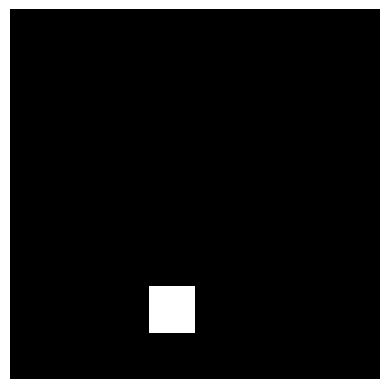

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [3]:
generate_bitmap_single_black()

In [4]:
bitmap = generate_bitmap_single_black(show=False)

In [5]:
np.where(bitmap)[0][0]

6

In [6]:
class SARSAAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        # Initialize the agent's Q-table to zeros
        self.q_table = np.zeros((8, 8, 9))  # 8x8 grid and 9 possible actions
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.epsilon_decay = epsilon_decay  # Decay rate of exploration
        self.epsilon_min = epsilon_min  # Minimum exploration rate
        
        # Define the action space
        self.actions = ['up', 'down', 'left', 'right', 'up_left', 'up_right', 'down_left', 'down_right', 'stay']

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            # Explore: choose a random action
            return np.random.choice(self.actions)
        else:
            # Exploit: choose the best action from Q-table
            x, y = state
            return self.actions[np.argmax(self.q_table[x, y])]

    def get_next_state(self, current_state, action):
        # This function returns the next state based on the current state and action
        x, y = current_state
        if action == 'up':
            return (max(x-1, 0), y)
        elif action == 'down':
            return (min(x+1, 7), y)
        elif action == 'left':
            return (x, max(y-1, 0))
        elif action == 'right':
            return (x, min(y+1, 7))
        elif action == 'up_left':
            return (max(x-1, 0), max(y-1, 0))
        elif action == 'up_right':
            return (max(x-1, 0), min(y+1, 7))
        elif action == 'down_left':
            return (min(x+1, 7), max(y-1, 0))
        elif action == 'down_right':
            return (min(x+1, 7), min(y+1, 7))
        else:
            return current_state

    def action_index(self, action):
        return self.actions.index(action)

    def update(self, current_state, action, reward, next_state, next_action):
        # Convert actions to their index in the Q-table
        action_index = self.action_index(action)
        next_action_index = self.action_index(next_action)

        # Perform the SARSA update to the Q-table
        current_q = self.q_table[current_state + (action_index,)]
        next_q = self.q_table[next_state + (next_action_index,)]
        target_q = reward + self.gamma * next_q
        self.q_table[current_state + (action_index,)] += self.alpha * (target_q - current_q)

        # Decay epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [7]:
# We'll re-use the train_agent function with minor modifications for SARSA
def train_agent(agent, goal_position, episodes=1000, verbose=False):
    for episode in range(episodes):
        # Start from a random position
        current_position = (np.random.randint(8), np.random.randint(8))
        current_action = agent.choose_action(current_position)

        while current_position != goal_position:
            next_position = agent.get_next_state(current_position, current_action)
            next_action = agent.choose_action(next_position)
            reward = -1  # Reward of -1 for each transition
            agent.update(current_position, current_action, reward, next_position, next_action)
            current_position, current_action = next_position, next_action

        # Optionally: Print out the Q-table every 100 episodes
        if verbose and episode % 100 == 0:
            print(f"Episode {episode}: Epsilon {agent.epsilon}")
            print(agent.q_table[:, :, :])


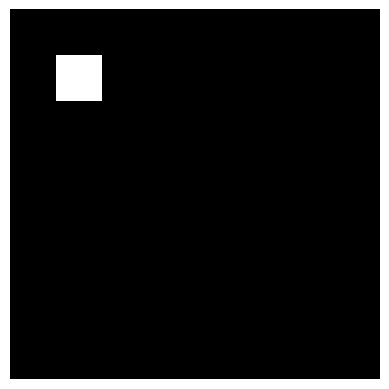

(1, 1)


In [8]:
b = generate_bitmap_single_black(show=True)
goal = np.where(b)
goal_position = (goal[0][0], goal[1][0])
print(goal_position)

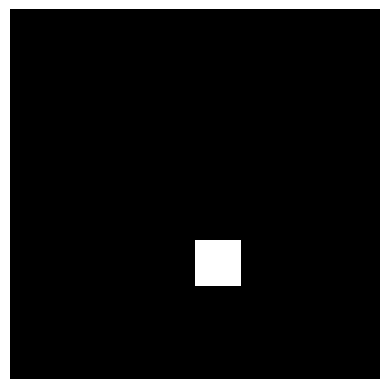

(5, 4)


array([[[-1.07553787, -1.03106269, -0.99963001, -1.0478908 ,
         -1.01162911, -1.1243209 , -1.02060888, -1.14657756,
         -1.17736512],
        [-1.67774298, -1.70988025, -1.68087367, -1.67560404,
         -1.71064749, -1.79015359, -1.69462087, -1.75536591,
         -1.76276043],
        [-2.01561679, -2.01532966, -1.94984404, -2.06592227,
         -2.01019763, -1.95456885, -1.9842471 , -1.98577883,
         -1.99090245]],

       [[-1.03561038, -1.12684209, -1.01775821, -1.01613045,
         -0.99996356, -1.03331486, -1.12798674, -1.06348497,
         -1.10250813],
        [-1.75414318, -1.75354267, -1.7144434 , -1.80601927,
         -1.71120462, -1.81248698, -1.75877485, -1.78372465,
         -1.76347118],
        [-1.9875826 , -1.97356898, -2.00110587, -1.9970358 ,
         -2.02437478, -2.00692433, -1.98510828, -1.99962007,
         -2.07279903]],

       [[-1.65307376, -1.75060975, -1.6808718 , -1.64623772,
         -1.63466647, -1.70703513, -1.70103135, -1.67159299,
    

In [9]:
# Initialize the SARSA agent
sarsa_agent = SARSAAgent()
bitmap = generate_bitmap_single_black(show=True)
goal = np.where(bitmap)
goal_position = (goal[0][0], goal[1][0])
print(goal_position)

# Train the SARSA agent with verbose output turned off for brevity
train_agent(sarsa_agent, goal_position, verbose=False)

# Return a slice of the Q-table for brevity in displaying the result
sarsa_agent.q_table[5:8, 5:8, :]  # Displaying a slice of the Q-table for the bottom-right corner

In [10]:
def make_video(agent, grid, start_position, goal_position, filename='agent_movement.mp4'):
    # Set up the video writer with a higher FPS to slow down the movement
    writer = imageio.get_writer(filename, fps=3)

    # Increase the size of the grid for better visibility
    scale_factor = 50  # Increase this if you want even larger frames
    large_grid = np.kron(grid, np.ones((scale_factor, scale_factor)))

    # Assume goal_position and all grid positions are initially 0 (black)
    # Set the goal position to 1 (white)
    grid[goal_position] = 1

    for step in range(100):  # Assume a maximum of 100 steps
        # Update the grid with the current agent position (set to 1 for white)
        grid[start_position] = 1
        large_grid = np.kron(grid, np.ones((scale_factor, scale_factor)))  # Scale up
        frame = (large_grid * 255).astype(np.uint8)  # Convert to an image
        frame = np.stack((frame,) * 3, axis=-1)  # Convert to RGB

        # Repeat each frame three times
        for _ in range(3):
            writer.append_data(frame)

        # Set the agent's previous position back to 0 (black)
        grid[start_position] = 0

        # Move the agent
        action = agent.choose_action(start_position)
        next_position = agent.get_next_state(start_position, action)

        # If the agent reaches the goal, update the grid and append the final frames
        if next_position == goal_position:
            grid[next_position] = 1  # Set the agent position to white
            large_grid = np.kron(grid, np.ones((scale_factor, scale_factor)))
            final_frame = (large_grid * 255).astype(np.uint8)
            final_frame = np.stack((final_frame,) * 3, axis=-1)
            for _ in range(3):
                writer.append_data(final_frame)
            break  # Break after showing the final move

        # Update the start position for the next step
        start_position = next_position

    writer.close()  # Close the writer to finalize the video

    return filename


In [11]:
# untrained agent
Video(make_video(SARSAAgent(), bitmap, (np.random.randint(8), np.random.randint(8)), goal_position, filename="untrained.mp4"))

In [12]:
# trained agent
Video(make_video(sarsa_agent, bitmap, (np.random.randint(8), np.random.randint(8)), goal_position, filename="trained.mp4"))